In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import re
import tqdm as tqdm
import warnings
warnings.filterwarnings('ignore')

In [107]:
os.listdir()

['.ipynb_checkpoints',
 'gender_submission.csv',
 'Submission Trial 1.csv',
 'Submission Trial 2.csv',
 'submission.csv',
 'test.csv',
 'Titanic Survival Prediction Model.ipynb',
 'train.csv']

In [108]:
os.getcwd()

'C:\\Users\\a238737\\Documents\\Data Science\\kaggle\\titanic'

# Data Preprocessing

## Load Data

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

In [110]:
train.shape, test.shape, gender_df.shape

((891, 12), (418, 11), (418, 2))

### Data Summery

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [114]:
# Checking Schema
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [115]:
# Checking Schema
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
# drop PassengerId
test_PassengerID = test['PassengerId'].values.tolist()
del train['PassengerId']
del test['PassengerId'] 

### Checking Duplicates

In [117]:
# check train set duplicates
print("Number of duplicated rows in train data: ",train.duplicated().sum())

# Check test duplicates
print("\nNumber of duplicated rows in test data: ", test.duplicated().sum())


Number of duplicated rows in train data:  0

Number of duplicated rows in test data:  0


### Number of unique values per column 

In [118]:
### Checking number of unique values per column in train set
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [119]:
### Checking number of unique values per column in test set
test.nunique()

Pclass        3
Name        418
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Cabin        76
Embarked      3
dtype: int64

### Missing Values

In [120]:
# Number of missing values in train set
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [121]:
# Percentage of missing vakues in 
train[['Age', 'Cabin', 'Embarked']].isna().mean()*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

-  77% of Cabin info is missing
    -  Therefore, we are going to drop this column
-  Age missing values will be imputed
-  Embarked missing values will be imputed

In [122]:
del train['Cabin']

In [123]:
train['Embarked'].mode()

0    S
dtype: object

In [124]:
# Replace Age missing values with the Median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Replace Embarked missing values with the Mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [125]:
# number of missing values in test set
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [126]:
# Percentage of missing vakues in 
test[['Age', 'Cabin', 'Fare']].isna().mean()*100

Age      20.574163
Cabin    78.229665
Fare      0.239234
dtype: float64

In [127]:
## Drop cabin column
del test['Cabin']

In [128]:
# Replace Age missing values with the Median
test['Age'].fillna(test['Age'].median(), inplace=True)

# Replace Embarked missing values with the Mode
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [129]:
# Check if there are still missing values
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [130]:
# Check if there are still missing values
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Outliers

In [131]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [132]:
Num_cols = ['Age', 'Fare']

In [133]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

**Check outlers for train set**

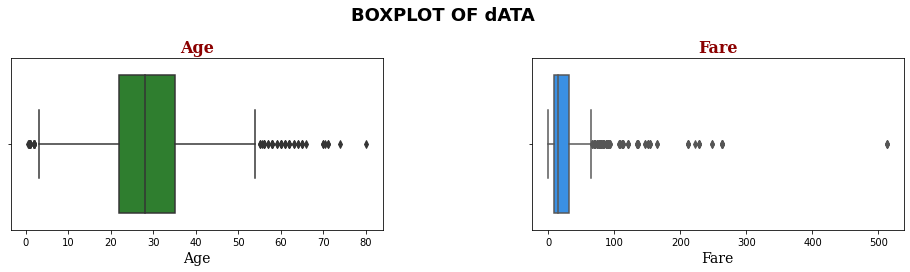

In [134]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = train, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

-  from the boxplots, we can see that both Age and Fare have outliers.
-  We will have to impute these outliers

**Finding the IQR For Age and Fare**

In [135]:
dict = {}
for col in ['Age' ,'Fare']:
    percentile25 = train[col].quantile(0.25)
    percentile75 = train[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

**Counting Upper Limit and Lower Limit**

In [136]:
for col in ['Age' ,'Fare']:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(train[train[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(train[train[col] > dict['upper_limit_' + col]] ) , col))

There are total 24 Customers data which Age are less than lower limit.
There are total 42 Customers data which Age are more than upper limit.
There are total 0 Customers data which Fare are less than lower limit.
There are total 116 Customers data which Fare are more than upper limit.


**Truncating Age and Fare with Upper and Lower Limitss**

In [137]:
for col in ['Age' , 'Fare']:
    train[col] = np.where(train[col] > dict['upper_limit_' + col],dict['upper_limit_' + col],
                 np.where(train[col] < dict['lower_limit_' + col], dict['lower_limit_' + col],
                 train[col] ))

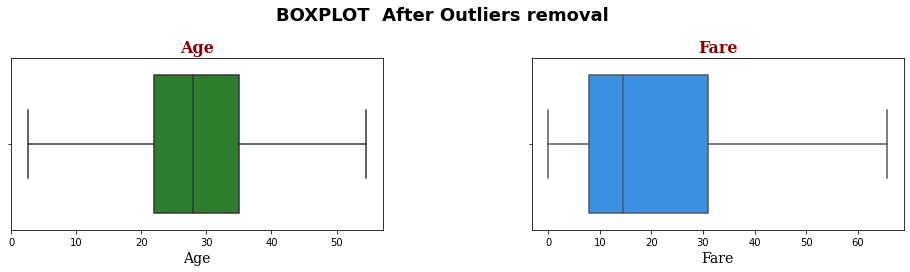

In [138]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT  After Outliers removal', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = train, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

-  outliers have been removed

**Check outlers for test set**

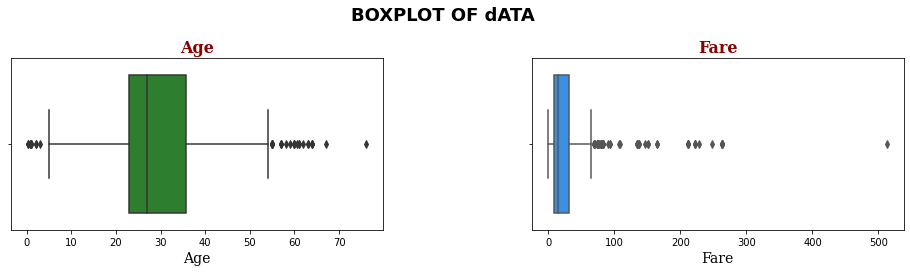

In [139]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = test, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

-  from the boxplots, we can see that both Age and Fare have outliers.
-  We will have to impute these outliers

**Finding the IQR For Age and Fare**

In [140]:
dict = {}
for col in ['Age' ,'Fare']:
    percentile25 = test[col].quantile(0.25)
    percentile75 = test[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

**Counting Upper Limit and Lower Limit**

In [141]:
for col in ['Age' ,'Fare']:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(test[test[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(test[test[col] > dict['upper_limit_' + col]] ) , col))

There are total 11 Customers data which Age are less than lower limit.
There are total 25 Customers data which Age are more than upper limit.
There are total 0 Customers data which Fare are less than lower limit.
There are total 55 Customers data which Fare are more than upper limit.


**Truncating Age and Fare with Upper and Lower Limitss**

In [142]:
for col in ['Age' , 'Fare']:
    test[col] = np.where(test[col] > dict['upper_limit_' + col],dict['upper_limit_' + col],
                np.where(test[col] < dict['lower_limit_' + col], dict['lower_limit_' + col],
                test[col] ))

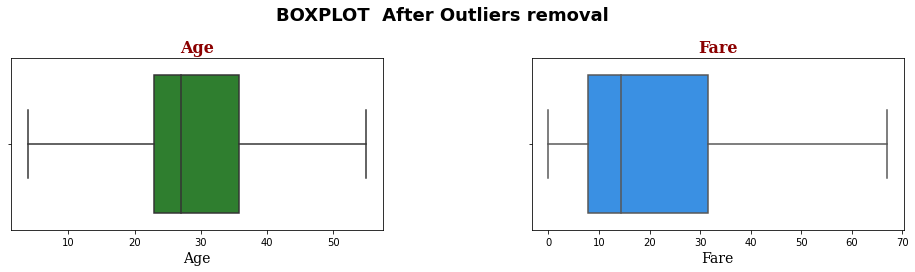

In [143]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT  After Outliers removal', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = test, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

-  Outliers have been removed

# EDA

##  Plots`


### Univariate Analysis

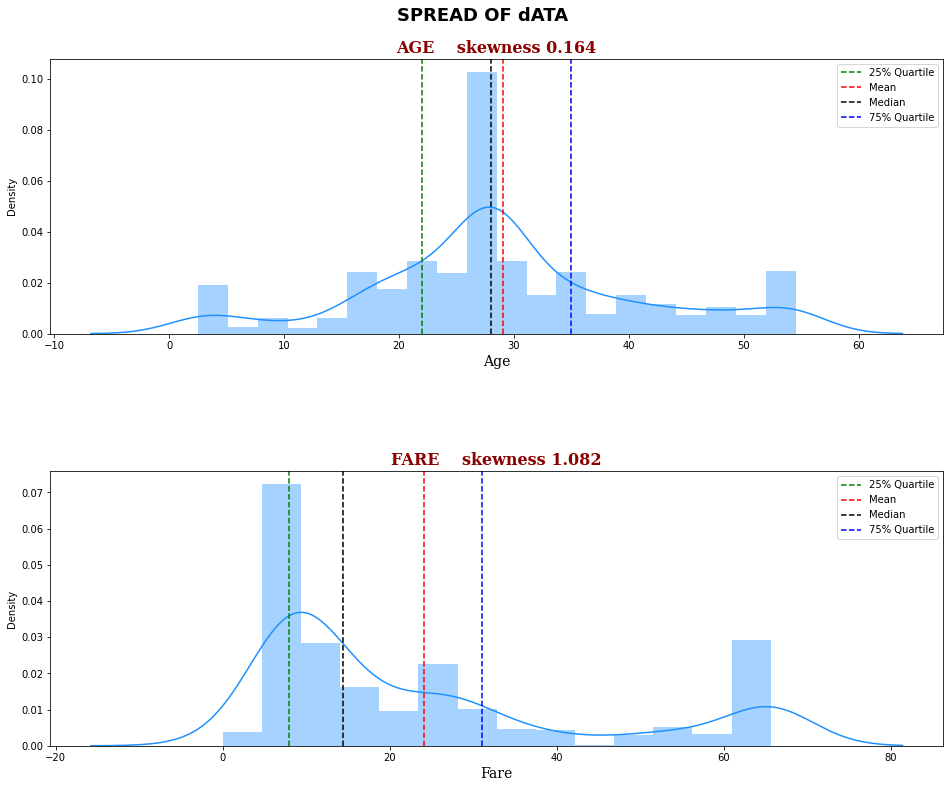

In [144]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax0 = fig.add_subplot(2, 1, i+1) 
    ax0 = sns.distplot(train[col],  color='dodgerblue')
    ax0.axvline(train[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax0.axvline(train[col].mean(),color='red',linestyle='--',label='Mean')
    ax0.axvline(train[col].median(),color='black',linestyle='--',label='Median')
    ax0.axvline(train[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax0.text('skewness: {}' .format(str(round(train[col].skew(),3))), ha='right', va='center', size=11)
    ax0.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax0.set_title(f'{col.upper()}    skewness {round(train[col].skew(),3)}', fontdict=axtitle_dict)
    ax0.legend(fontsize=10)

In [145]:
categ_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

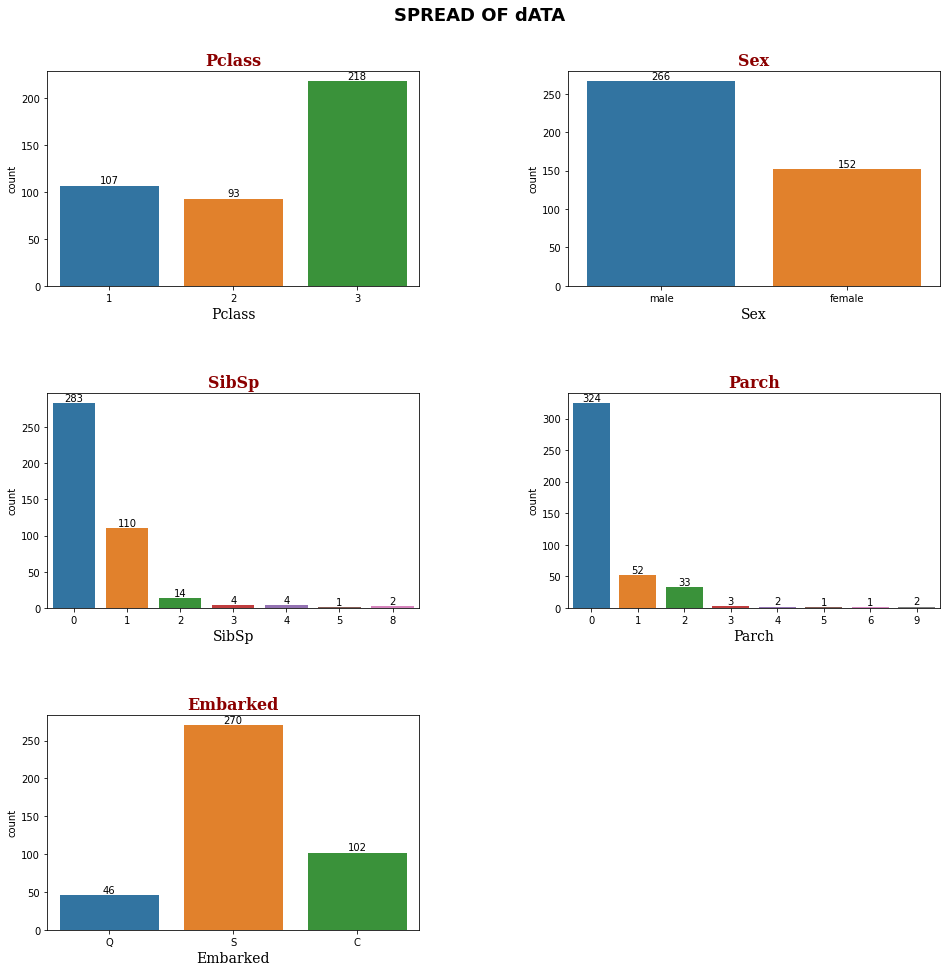

In [146]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,15])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3,2, i+1)
    a=sns.countplot(x = test[col] , ax=a)
    a.bar_label(a.containers[0])
    a.set_title(col , fontdict=axtitle_dict)
    a.set_xlabel(col , fontdict=axlab_dict)

### Bivariate Analysis

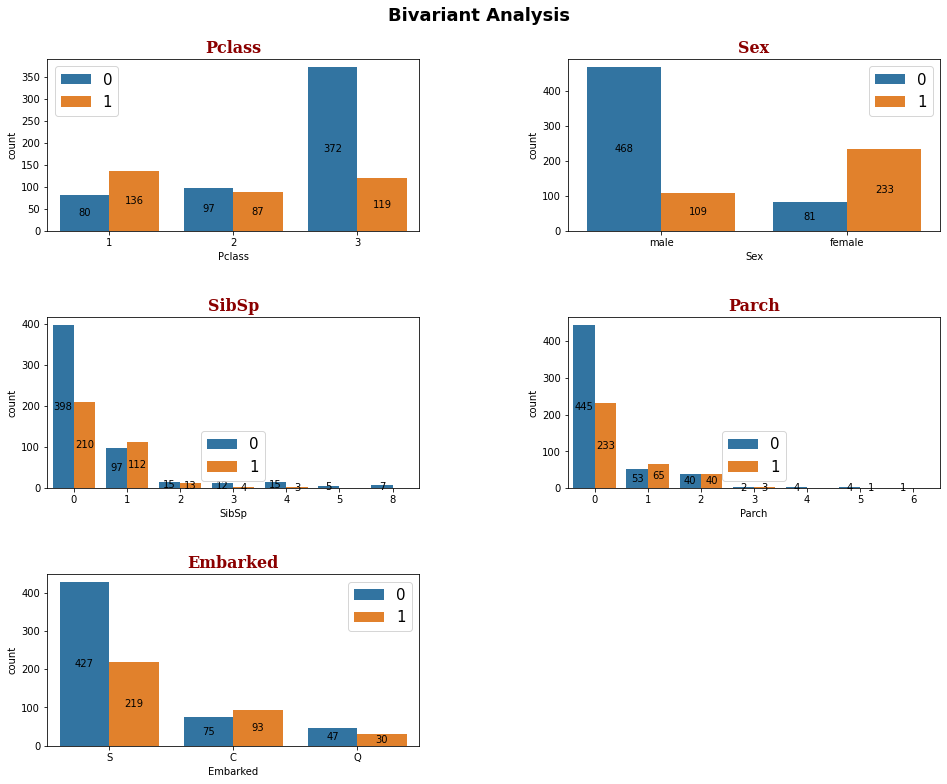

In [147]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 2, i+1)
    a=sns.countplot(x = train[col] , ax=a , hue = train['Survived'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15, loc = 'best')

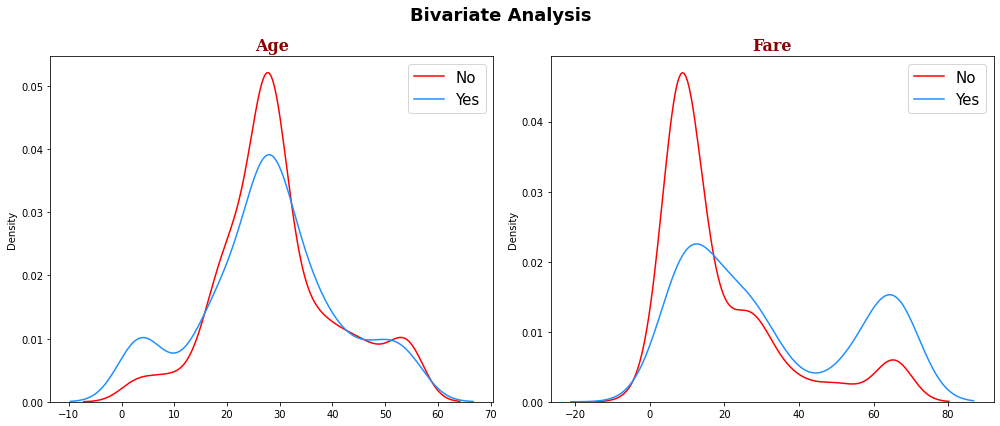

In [148]:
fig = plt.figure(figsize=[14,6])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(1,2 , i+1)
    
    sns.distplot(x =train[train['Survived']==0][col],  color='red' , ax=a ,  hist =False )
    sns.distplot(x =train[train['Survived']==1][col],  color= 'dodgerblue', ax=a , hist =False ) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    plt.tight_layout()
    a.legend( labels  , fontsize = 15)

### Corrilation Matrix

In [149]:
# corr = train.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')

<AxesSubplot:>

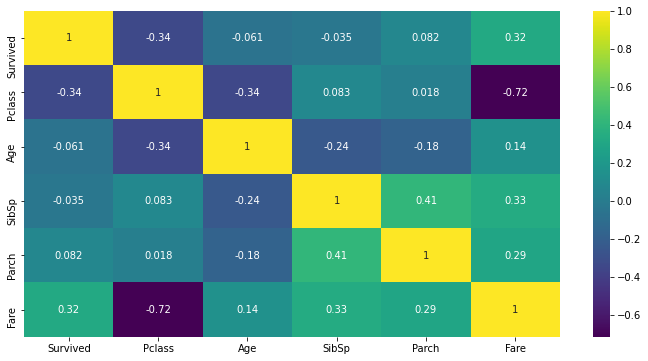

In [150]:
corr = train.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True,  cmap='viridis')

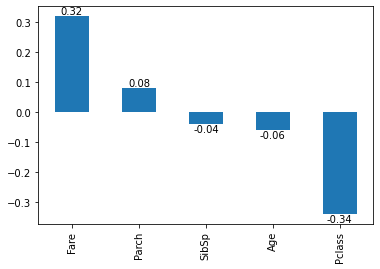

In [151]:
# Correlation of categorical columns
ax = round(corr['Survived'][1:],2).sort_values(ascending = False).plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show() 

-  we can see that Fare is highly correlated with whether a passenger will survive or not.
    -  this is because higher fare usually means, in this case, first class ticket.
    -  First class means that rich people could afford these tickets, in this case, rich people or first class ticket holders stood more chance to survive than those holding other classes.
    -  This is confirmed by Pclass. We can see that the correlation with survival is negative. 
        -  meaning, as passenger class increase from first to the last class, chances of survival declines.
        -  priority of survival is to the first class passengers
-  Age as negatively correlated to survival.
    -  This means priority is given to the young ones
    -  The older you are, the more likely you are to die.

### Explore Pattern

In [152]:
women = train[train['Sex']=='female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived", round(rate_women*100,2))

% of women who survived 74.2


In [153]:
men = train[train['Sex']=='male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived", round(rate_men*100,2))

% of men who survived 18.89


### Get Dummies

In [154]:
# Pclass to Object
# train['Pclass'] =train['Pclass'].astype(str)
# test['Pclass'] =test['Pclass'].astype(str)

In [155]:
# Parch to Object
# train['Parch'] =train['Parch'].astype(str)
# test['Parch'] =test['Parch'].astype(str)

In [156]:
# SibSp to Object
# train['SibSp'] =train['SibSp'].astype(str)
# test['SibSp'] =test['SibSp'].astype(str)

In [158]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [159]:
y = train['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]

# dummies for train data
X = pd.get_dummies(train[features])
X = pd.concat([X, train[["Age",'Fare']]], axis=1)

# get dummies for test data
X_test = pd.get_dummies(test[features])
X_test = pd.concat([X_test, test[["Age",'Fare']]], axis=1)

In [160]:
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare
0,3,1,0,0,1,22.0,7.2500
1,1,1,0,1,0,38.0,65.6344
2,3,0,0,1,0,26.0,7.9250
3,1,1,0,1,0,35.0,53.1000
4,3,0,0,0,1,35.0,8.0500


In [161]:
X_test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare
0,3,0,0,0,1,34.500,7.8292
1,3,1,0,1,0,47.000,7.0000
2,2,0,0,0,1,54.875,9.6875
3,3,0,0,0,1,27.000,8.6625
4,3,1,1,1,0,22.000,12.2875


# Modelling

### Train Test Split

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train, val_train, x_test, val_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [164]:
# check the shape of train and validation sets
x_train.shape, val_train.shape, x_test.shape, val_test.shape

((668, 7), (223, 7), (668,), (223,))

### Building  a Dummy Classifier

In [165]:
from sklearn.dummy import DummyClassifier

In [166]:
# Create a dummy classifier
dummy_model = DummyClassifier(strategy='uniform', random_state=42)

In [167]:
# Train or Fit the Model
dummy_model.fit(x_train, x_test)

DummyClassifier(random_state=42, strategy='uniform')

In [168]:
# predict for the validation train data
dummy_preds = dummy_model.predict(val_train)

In [169]:
# Get accuracy score
# compare predicted values to the actual val_test values
dummy_model.score(dummy_preds, val_test)

0.4977578475336323

-  By comparing the baseline dummy classifier to our trained classifier, we can see the improvement
-  Following, we will build a baseline model and compare it to the dummy classifier to see the  improvement in score

### Evaluate  Multiple Base Models

-  Links to explain


https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [171]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier())
            ]

    results = []
    names = []
    Test_Accuracy = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ["Not Survived", 'Survived']

    for name, model in models[:]:

        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train, X_test, cv=kfold, scoring=scoring, n_jobs=-1)
        
        # fit the model
        clf = model.fit(X_train, X_test)
        
        # Predict for validation set
        y_pred = clf.predict(val_train)
        
        print(f"****************************** {name} **************************" )
        print(classification_report(y_test, y_pred, target_names=target_names))

        results.append(cv_results)
    
        Test_Accuracy.append(cv_results.get('test_accuracy')) # retreiving test scores from the cv_results dictionary output
        names.append(name)

        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)
    Final_mean_score = final.groupby('model').mean()
    
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(Test_Accuracy)
    ax.set_xticklabels(names)
    
    plt.show()

    return final, Final_mean_score

****************************** LogReg **************************
              precision    recall  f1-score   support

Not Survived       0.82      0.82      0.82       137
    Survived       0.72      0.72      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

****************************** RF **************************
              precision    recall  f1-score   support

Not Survived       0.80      0.87      0.84       137
    Survived       0.76      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223

****************************** KNN **************************
              precision    recall  f1-score   support

Not Survived       0.73      0.77      0.75       137
    Survived       0.60      0.53      0.56      

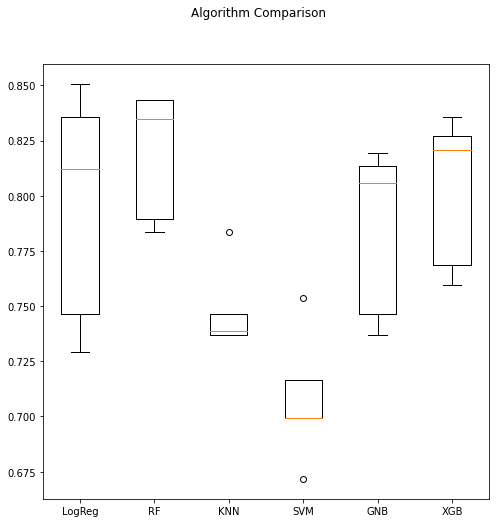

In [172]:
df_output, df_Output_mean_scores = run_exps(x_train, val_train, x_test, val_test)

In [173]:
df_output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.031238,0.015620,0.835821,0.837739,0.835821,0.831562,0.856249,LogReg
1,0.031238,0.015620,0.850746,0.849783,0.850746,0.849456,0.908339,LogReg
2,0.031238,0.015620,0.746269,0.744953,0.746269,0.745441,0.843171,LogReg
3,0.031238,0.015620,0.729323,0.731808,0.729323,0.730399,0.815112,LogReg
4,0.031238,0.015620,0.812030,0.810576,0.812030,0.810870,0.877212,LogReg
5,0.153380,0.046906,0.843284,0.843099,0.843284,0.840680,0.859320,RF
6,0.168967,0.031281,0.843284,0.846995,0.843284,0.838681,0.877864,RF
7,0.169038,0.031212,0.783582,0.784295,0.783582,0.783894,0.798148,RF
8,0.264559,0.059709,0.789474,0.797056,0.789474,0.791648,0.865039,RF
9,0.264559,0.067690,0.834586,0.834586,0.834586,0.834586,0.889048,RF


In [174]:
df_Output_mean_scores.reset_index(inplace=True)

In [175]:
df_Output_mean_scores.index

RangeIndex(start=0, stop=6, step=1)

In [176]:
df_Output_mean_scores

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,GNB,0.005386,0.012964,0.784413,0.787010,0.784413,0.785011,0.847866
1,KNN,0.000000,0.025245,0.748468,0.747400,0.748468,0.747451,0.778017
2,LogReg,0.031238,0.015620,0.794838,0.794972,0.794838,0.793546,0.860017
3,RF,0.204101,0.047360,0.818842,0.821206,0.818842,0.817898,0.857884
4,SVM,0.007601,0.025029,0.708057,0.708954,0.708057,0.687745,0.778575
5,XGB,0.305360,0.030211,0.802368,0.804516,0.802368,0.801123,0.855467


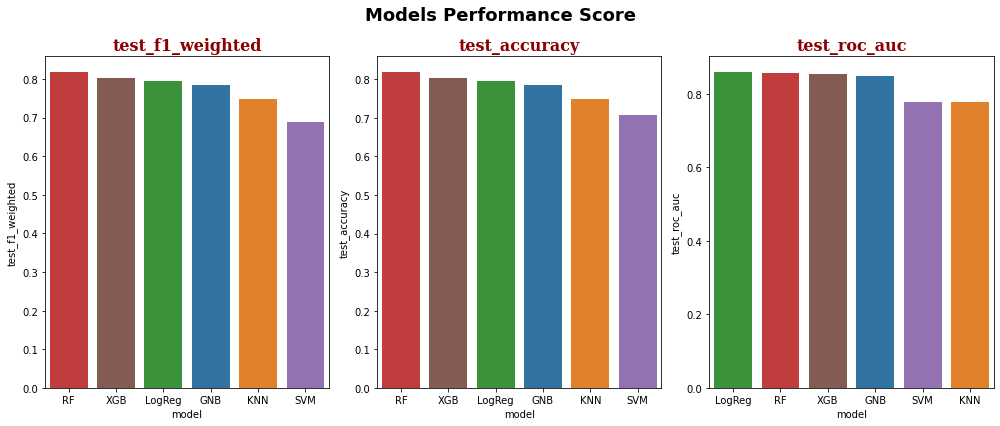

In [177]:
df_plots = df_Output_mean_scores[['model','test_f1_weighted' , 'test_accuracy', 'test_roc_auc']]
accuracy_columns = ['test_f1_weighted' , 'test_accuracy', 'test_roc_auc']

fig = plt.figure(figsize=[14,6])
fig.suptitle('Models Performance Score', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

for i ,col in enumerate(accuracy_columns):
    a = fig.add_subplot(1, 3, i+1)
    sns.barplot(data = df_plots, x = 'model', y = col, hue ='model',
                     order =df_plots.sort_values(col, ascending=False)['model'],
                     dodge=False, ax =a)

    a.set_title(col , fontdict=axtitle_dict)
    a.legend([],[], frameon=False) # Remove Legend
    plt.tight_layout()

### Choosing the Best Model

-  Compare to the Baseline Dummy Model:
    -  Dummy Accuracy is = 49%
    -  Here, all models scored above 70% in all test_scores, meaning they performed better than the dummy model
    -  RandomForest is topping in the first two graphs.
-  By looking at the test_roc_auc, we can see the top three are:
    -  RandomForest,
    -  LogReg
    -  XGB

    therefore, since RandomForest performed better than all, it will be used as the model of choice moving forward.

## Model Improvement 

#### Shuffling the dataset

-  Since we are dealing with a Binary Classification problem, and the distribution of the classes are not equal,
it is better to shuffle the dataset in order to minimise variance and ensure that the model will generalise well to new, unseen data points.

In [178]:
# Train data before shuffling
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [179]:
# shuffle using pd.sample()
# set frac=1, since we want to shuffle the whole train dataset
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# train data after shuffling
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,1,1,2661,15.2458,C
1,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,S
2,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,S
3,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,S
4,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C


#### Get Dummies

In [180]:
y = train['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]

# dummies for train data
X = pd.get_dummies(train[features])
X = pd.concat([X, train[["Age",'Fare']]], axis=1)

# get dummies for test data
X_test = pd.get_dummies(test[features])
X_test = pd.concat([X_test, test[["Age",'Fare']]], axis=1)

#### train test split

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x_train, val_train, x_test, val_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [183]:
# check the shape of train and validation sets
x_train.shape, val_train.shape, x_test.shape, val_test.shape

((668, 7), (223, 7), (668,), (223,))

#### RandomForestClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

In [185]:
# create a RandomForest instance
rf = RandomForestClassifier( n_jobs=-1)

# create a k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Validation Curves

#### Check N Estimators

In [186]:
# create
n_estimators_range = np.arange(100, 400, 20) # from 100 to 400 in steps of 20

# create a validation curve
train_score, valid_score = validation_curve(rf, x_train, x_test, 
                                            param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv= 5,
                                              scoring='accuracy')

In [187]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

In [188]:
# Calculating mean and standard deviation of testing score
mean_valid_score = np.mean(valid_score , axis = 1)
std_valid_score = np.std(valid_score , axis = 1)

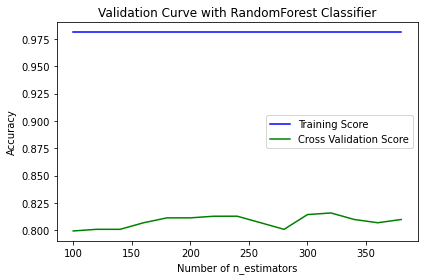

In [189]:
# Plot mean accuracy scores for training and testing scores
plt.plot(n_estimators_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(n_estimators_range, mean_valid_score,
   label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("Number of n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [190]:
Best_N_estimators = pd.DataFrame({'Estimator_range':n_estimators_range,
                                  'Mean Train score': mean_train_score,
                                 'Mean Validation Score': mean_valid_score}).sort_values(by='Mean Validation Score', ascending=False).reset_index(drop=True)

In [191]:
Best_N_estimators

,Estimator_range,Mean Train score,Mean Validation Score
0,320,0.980911,0.815857
1,300,0.980911,0.814375
2,240,0.980911,0.812883
3,220,0.980911,0.812861
4,200,0.980911,0.811390
5,180,0.980911,0.811368
6,380,0.980911,0.809887
7,340,0.980911,0.809875
8,260,0.980911,0.806913
9,360,0.980911,0.806913


-  We can see that, when testing the values of the n_estimators in the range 100 to 400, the best values appears to be 81.6% at 320 n_estimators. 
    -  Therefore, we will choose 140 as the number of our n_estimators.
    -  **n_estimators = 320**
-  It is important to note that, even though there appears to be a large difference between the training and cross-validation score, the training set had an average accuracy of 98.5% for each of the three cross-validations,
and the cross-validation set had between 78.87% and 79.79% accuracy for all the values of n_estimators, which shows that this model is very accurate regardless of the number of estimators used

#### Check max depth

In [192]:
# create
max_depth_range = np.arange(5, 30, 5) # from 5 to 30 in steps of 5

# create a validation curve
train_score, valid_score = validation_curve(rf, x_train, x_test, 
                                            param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv= 5,
                                              scoring='accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_valid_score = np.mean(valid_score , axis = 1)
std_valid_score = np.std(valid_score , axis = 1)

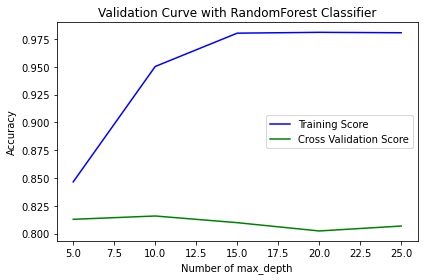

In [193]:
# Plot mean accuracy scores for training and testing scores
plt.plot(max_depth_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(max_depth_range, mean_valid_score,
   label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("Number of max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [194]:
Best_max_depth = pd.DataFrame({'Max Depth range':max_depth_range,
                                  'Mean Train score': mean_train_score,
                                 'Mean Validation Score': mean_valid_score}).sort_values(by='Mean Validation Score', ascending=False).reset_index(drop=True)

In [195]:
Best_max_depth

,Max Depth range,Mean Train score,Mean Validation Score
0,10,0.950223,0.815879
1,5,0.846557,0.812894
2,15,0.980163,0.809887
3,25,0.980538,0.806868
4,20,0.980911,0.802435


-  In the max_depth graph, we see that the accuracy is increasing for training but declining for cross-validation.
    -  According to the graph, the optimum score is 81.6% at 10 max_depth. 
    
-  **max_depth = 10**

#### Check min_sample_split

In [196]:
# create
min_sample_split_range = np.arange(2, 30, 5) # from 5 to 30 in steps of 5

# create a validation curve
train_score, valid_score = validation_curve(rf, x_train, x_test, 
                                            param_name="min_samples_split",
                                              param_range=min_sample_split_range,
                                              cv= 5,
                                              scoring='accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_valid_score = np.mean(valid_score , axis = 1)
std_valid_score = np.std(valid_score , axis = 1)

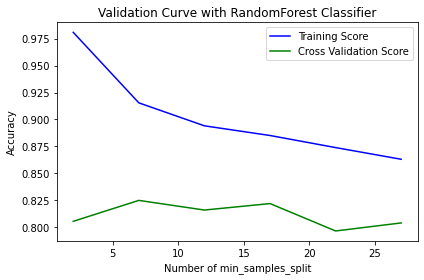

In [197]:
# Plot mean accuracy scores for training and testing scores
plt.plot(min_sample_split_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(min_sample_split_range, mean_valid_score,
   label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("Number of min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [198]:
Best_min_sample_split = pd.DataFrame({'min_samples_split range':min_sample_split_range,
                                  'Mean Train score': mean_train_score,
                                 'Mean Validation Score': mean_valid_score}).sort_values(by='Mean Validation Score', ascending=False).reset_index(drop=True)

In [199]:
Best_min_sample_split

,min_samples_split range,Mean Train score,Mean Validation Score
0,7,0.915420,0.824834
1,17,0.885101,0.821872
2,12,0.894087,0.815868
3,2,0.980911,0.805398
4,27,0.863022,0.803905
5,22,0.873873,0.796443



-  **min_samples_split = 7**
-  **test_score = 82.5%**

#### Check min_sample_leaf

In [200]:
# create
min_sample_leaf_range = np.arange(1, 10, 1) # from 1 to 10 in steps of 1

# create a validation curve
train_score, valid_score = validation_curve(rf, x_train, x_test, 
                                            param_name="min_samples_leaf",
                                              param_range=min_sample_leaf_range,
                                              cv= 5,
                                              scoring='accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_valid_score = np.mean(valid_score , axis = 1)
std_valid_score = np.std(valid_score , axis = 1)

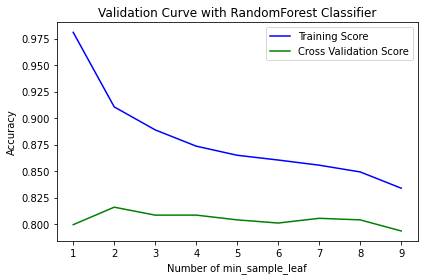

In [201]:
# Plot mean accuracy scores for training and testing scores
plt.plot(min_sample_leaf_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(min_sample_leaf_range, mean_valid_score,
   label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("Number of min_sample_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [202]:
Best_min_sample_leaf = pd.DataFrame({'min_sample_leaf range':min_sample_leaf_range,
                                  'Mean Train score': mean_train_score,
                                 'Mean Validation Score': mean_valid_score}).sort_values(by='Mean Validation Score', ascending=False).reset_index(drop=True)

In [203]:
Best_min_sample_leaf

,min_sample_leaf range,Mean Train score,Mean Validation Score
0,2,0.910552,0.815902
1,4,0.873501,0.808428
2,3,0.888841,0.808405
3,7,0.855539,0.805409
4,5,0.864893,0.803939
5,8,0.849174,0.803928
6,6,0.860405,0.800954
7,1,0.980911,0.799394
8,9,0.833831,0.793469


-  **min_samples_leaf = 2**

It is important to note that, when constructing the validation curves, the other parameters were held at their default values. So now, we will be using all of the optimized values together in a single model. A new Random Forest Classifier was constructed, as follows:

#### Check RandomForest (optimized 1)

In [204]:
rf_optimized = RandomForestClassifier(random_state = 42,
                                  n_estimators = 320,
                                  max_depth = 10, 
                                  min_samples_split = 7,  
                                  min_samples_leaf = 2,
                                  n_jobs= -1) 

# fit the model
model_rf_optimized = rf_optimized.fit(x_train, x_test) 

# predict for val_train
y_pred_optimized = model_rf_optimized.predict(val_train)

# get accuray score
optimized_score = accuracy_score(y_pred_optimized, val_test)
print("The accuracy score is: ", round(optimized_score,2))

The accuracy score is:  0.83


-  Baseline Model test score = 81.8%
-  New test score after manually tuning parameters = 83%
-  The score improved by 1% compared to the baseline model at default parameters.


In [205]:
target_names =["Not Survived", 'Survived']
print(classification_report(val_test, y_pred_optimized, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.85      0.89      0.87       137
    Survived       0.81      0.74      0.78        86

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



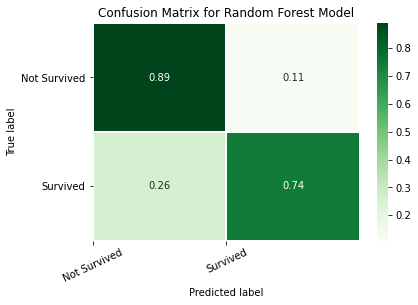

In [206]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

conf_mat = confusion_matrix(val_test, y_pred_optimized, normalize='true')

sns.heatmap(conf_mat, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = target_names
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Grid Search

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
%%time
RF = RandomForestClassifier(random_state=42, n_jobs=-1)

# defining a dictionary
parameter_grid = {'n_estimators' : [100, 150, 200, 250],
                    'max_depth' : [5, 8, 15, 25],
                    'min_samples_split' : [2, 5, 10, 15, 30],
                    'min_samples_leaf' : [1, 2, 5, 10]
                        }

grid_search = GridSearchCV(RF, param_grid=parameter_grid, cv = 5, verbose = 0, 
                      n_jobs = -1)
# Fit gridsearch
best_params = grid_search.fit(x_train, x_test)
print(best_params)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 30],
                         'n_estimators': [100, 150, 200, 250]})
Wall time: 3min 30s


In [209]:
# best parameters according to grid search
best_params.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [210]:
# fit the random forest with new parameters from gridsearch
rf_optimized_2 = RandomForestClassifier(random_state = 42, max_depth= 8,
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100, n_jobs= -1) 

# fit the model
model_rf_optimized_2 = rf_optimized_2.fit(x_train, x_test) 

# predict for val_train
y_pred_optimized_2 = model_rf_optimized_2.predict(val_train)

# get accuray score
optimized_score_2 = accuracy_score(y_pred_optimized_2, val_test)
print("The accuracy score is: ", round(optimized_score_2,2))

The accuracy score is:  0.84


-  Model Accuracy improved by 3% compared to the default or baseline model
-  Model accuracy improved by 1% compared to the manually optimized model

### Feature Engineering

#### Add new column

In [211]:
# create a new column named 'family'
x_train['Family'] = np.where(x_train['SibSp']+x_train['Parch'] > 0 , 1 , 0)
val_train['Family'] = np.where(val_train['SibSp']+val_train['Parch'] > 0 , 1 , 0)
test['Family'] = np.where(test['SibSp']+test['Parch'] > 0 , 1 , 0)
x_train.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare,Family
477,1,0,0,1,0,24.0,65.6344,0
265,1,0,0,0,1,54.5,26.5500,0
722,3,8,2,0,1,28.0,65.6344,1
148,1,1,0,1,0,28.0,65.6344,1
61,2,0,1,1,0,13.0,19.5000,1


In [212]:
rf_optimized_3 = RandomForestClassifier(random_state = 42, max_depth= 8,
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100, n_jobs= -1) 

# fit the model
model_rf_optimized_3 = rf_optimized_3.fit(x_train, x_test) 

# predict for val_train
y_pred_optimized_3 = model_rf_optimized_3.predict(val_train)

# get accuray score
optimized_score_3 = accuracy_score(y_pred_optimized_3, val_test)
print("The accuracy score is: ", round(optimized_score_3,2))

The accuracy score is:  0.83


-  Adding the new column makes no difference to the score

#### Feature Importance

In [213]:
from sklearn.inspection import permutation_importance

In [214]:
r = permutation_importance(rf_optimized_3, x_train, x_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in x_train.columns])
perm['AVG_Importance'] = r.importances_mean

<AxesSubplot:>

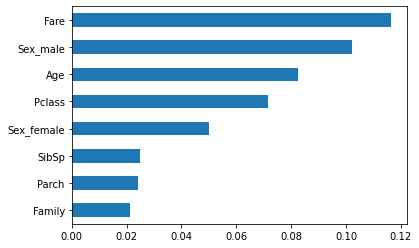

In [215]:
perm['AVG_Importance'].sort_values(ascending=True).plot.barh()

#### Feature Elimination

In [216]:
from sklearn.feature_selection import RFECV

In [217]:
%%time
features = x_train.copy()
target = x_test.copy()


rfecv = RFECV(estimator=RF, step=1, cv=5, n_jobs=-1, min_features_to_select=3)
#             rfecv = RFECV(estimator=LR, step=1, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

Wall time: 5.66 s


array([[ 1.    ,  1.    ,  0.    , 24.    , 65.6344],
       [ 1.    ,  0.    ,  1.    , 54.5   , 26.55  ],
       [ 3.    ,  0.    ,  1.    , 28.    , 65.6344],
       ...,
       [ 3.    ,  0.    ,  1.    , 28.    ,  7.925 ],
       [ 3.    ,  0.    ,  1.    ,  7.    , 29.125 ],
       [ 3.    ,  0.    ,  1.    , 29.    ,  7.8958]])

In [218]:
# rank features
rank = rfecv.ranking_.tolist()
best_features = rfecv.support_.tolist()

# create a dataframe for the ranked features
RankFeatures = pd.DataFrame({'columns':features.columns.tolist()[:],
                             'feature_rank':rank,
                             'best_feature':best_features}).sort_values(by='feature_rank', ascending=True).reset_index(drop=True)

In [219]:
RankFeatures

,columns,feature_rank,best_feature
0,Pclass,1,True
1,Sex_female,1,True
2,Sex_male,1,True
3,Age,1,True
4,Fare,1,True
5,SibSp,2,False
6,Parch,3,False
7,Family,4,False


-  SibSp, Parch and family are not considered as best features to use according to the model RFECV
-  Therefore, drop these features and check the accuracy score

In [220]:
# test data
X_test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age,Fare
0,3,0,0,0,1,34.500,7.8292
1,3,1,0,1,0,47.000,7.0000
2,2,0,0,0,1,54.875,9.6875
3,3,0,0,0,1,27.000,8.6625
4,3,1,1,1,0,22.000,12.2875


In [221]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,54.875,0,0,240276,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.000,0,0,A.5. 3236,8.0500,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.000,0,0,PC 17758,66.9063,C,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.500,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,3,"Ware, Mr. Frederick",male,27.000,0,0,359309,8.0500,S,0


In [222]:
# drop features from x_train and val_train
X_train = x_train.drop(['SibSp', 'Parch', 'Family'], axis=1)
Val_train = val_train.drop(['SibSp', 'Parch', 'Family'], axis=1)

# drop features from the test data
test_data = X_test.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch', 'Family'], axis=1)

In [223]:
X_train.head()

,Pclass,Sex_female,Sex_male,Age,Fare
477,1,1,0,24.0,65.6344
265,1,0,1,54.5,26.5500
722,3,0,1,28.0,65.6344
148,1,1,0,28.0,65.6344
61,2,1,0,13.0,19.5000


In [224]:
# run the optimized random forest with the new features
rf_optimized_4 = RandomForestClassifier(random_state = 42, max_depth= 15,
                                         min_samples_leaf= 1,
                                         min_samples_split= 15,
                                         n_estimators= 250, n_jobs= -1) 

# fit the model
model_rf_optimized_4 = rf_optimized_4.fit(X_train, x_test) 

# predict for val_train
y_pred_optimized_4 = model_rf_optimized_4.predict(Val_train)

# get accuray score
optimized_score_4 = accuracy_score(y_pred_optimized_4, val_test)
print("The accuracy score is: ", round(optimized_score_2,2))

The accuracy score is:  0.84


-  No changes in the accuracy score

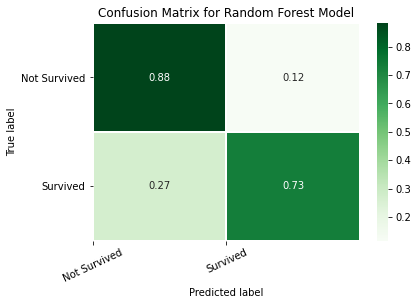

In [225]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

conf_mat = confusion_matrix(val_test, y_pred_optimized_4, normalize='true')

sns.heatmap(conf_mat, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = target_names
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Predict for the test dataset

In [226]:
predictions = rf_optimized_4.predict(test_data)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [227]:
len(predictions), test.shape

(418, (418, 7))

In [228]:
test_data.head()

,Pclass,Sex_female,Sex_male,Age,Fare
0,3,0,1,34.500,7.8292
1,3,1,0,47.000,7.0000
2,2,0,1,54.875,9.6875
3,3,0,1,27.000,8.6625
4,3,1,0,22.000,12.2875


In [229]:
test

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.500,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,54.875,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.000,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,3101298,12.2875,S
...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.000,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.000,PC 17758,66.9063,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.500,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,27.000,359309,8.0500,S


In [230]:
f_output  = pd.DataFrame({'PassengerId': test_PassengerID,
                         'Survived': predictions})

In [231]:
f_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [232]:
f_output.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [177]:
f_output.to_csv('Submission Trial 2.csv', index=False)

# Recommendations

-  The model performance can still be further improved
-  Consider Exploring other Models, for example, logistic regression f-1 score was the highest in " Evaluate Multiple Base Models" 
-  Feature Engineering:
    -  Title: from the names column, titles can be extracted and added as a separate feature
    -  Age Range: Add an age range/bucket colum to show in which age group a passenger belongs to.
    -  Tickets: Clean the tickets column to remove strings and leave only digits values
-  Consider, instead of get dummies, label encoding or one - hot encoding
-  Consider upsampling the dataset so that the Survival split could be 50/50.

# References

-  Optimize Random Forest
    -  https://medium.com/towards-data-science/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
        
-  EDA Plots:
    -  https://www.kaggle.com/code/rakeshrauniyar/titanic-survival-prediction-eda/notebook
        
-  Compare Multiple Plots:
    -  https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0
    
-  Feature Engineering:
    -  https://www.kaggle.com/code/merencelebi/titanic-survive
    
-  Feature Importance:
    -  https://medium.com/@ali.soleymani.co/stop-using-random-forest-feature-importances-take-this-intuitive-approach-instead-4335205b933f